### Chocolate Bar Ratings
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

Flavors of Cacao Rating System:<br>
5= Elite (Transcending beyond the ordinary limits)<br>
4= Premium (Superior flavor development, character and style)<br>
3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)<br>
2= Disappointing (Passable but contains at least one significant flaw)<br>
1= Unpleasant (mostly unpalatable)

### Data description
Company (Maker-if known) - Name of the company manufacturing the bar.<br>
Specific Bean Origin or Bar Name - The specific geo-region of origin for the bar.<br>
Review Date - Date of publication of the review.<br>
Cocoa Percent - Cocoa percentage (darkness) of the chocolate bar being reviewed.<br>
Company Location - Manufacturer base country.<br>
Rating - Expert rating for the bar.<br>
Bean Type - The variety (breed) of bean used, if provided.<br>
Broad Bean Origin - The broad geo-region of origin for the bean

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

%matplotlib inline 
import os
# Set work Directory
os.chdir("../input")

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
%%HTML
<center><img src="https://e.rpp-noticias.io/normal/2018/08/14/353935_662104.jpg"><center>

Column names

In [11]:
# Read Data
cacao = pd.read_csv('flavors_of_cacao.csv')
list(cacao)

['Company\xa0\n(Maker-if known)',
 'Specific Bean Origin\nor Bar Name',
 'REF',
 'Review\nDate',
 'Cocoa\nPercent',
 'Company\nLocation',
 'Rating',
 'Bean\nType',
 'Broad Bean\nOrigin']

In [12]:
# Rename columns
cacao.columns = ['company', 'bean_orig', 'ref', 'review_date', 'cacao_percent',
                 'company_location', 'rating', 'bean_type', 'broad_bean_origin' ]

**Looking for nulls**<br>
**Inspecting type**

In [14]:
# Looking for nulls
print(cacao.isnull().any())

# Inspecting type
print(cacao.dtypes)

company              False
bean_orig            False
ref                  False
review_date          False
cacao_percent        False
company_location     False
rating               False
bean_type             True
broad_bean_origin     True
dtype: bool
company               object
bean_orig             object
ref                    int64
review_date            int64
cacao_percent         object
company_location      object
rating               float64
bean_type             object
broad_bean_origin     object
dtype: object


In [15]:
#cacao_percent to number
cacao['cacao_percent']= cacao['cacao_percent'].str.strip('%').astype(float)
cacao.head()

,company,bean_orig,ref,review_date,cacao_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [16]:
# Broad Bean Origin
print('Number of Broad Bean Origin %d' % cacao[cacao.broad_bean_origin != '\xa0'].broad_bean_origin.dropna().nunique())

Number of Broad Bean Origin 99


## Top-10 Broad Bean Origin

Fig 1: Top-10 Broad Bean Origin


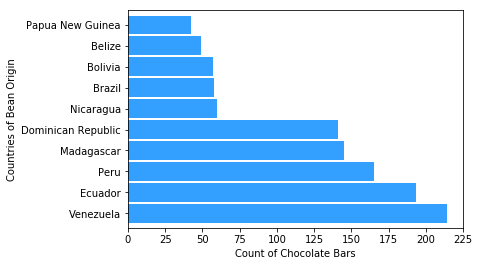

In [17]:
bean_origin = cacao[cacao.broad_bean_origin != '\xa0'].broad_bean_origin.value_counts()
bean_origin[:10].plot.barh(width=0.9, color = '#339FFF')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Countries of Bean Origin')
print("Fig 1: Top-10 Broad Bean Origin")

In [19]:
## Top-10 Company Location

Fig 2: Top-10 Company Location


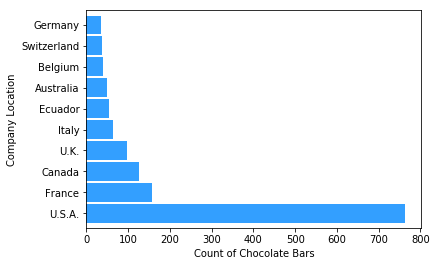

In [20]:
companyL = cacao.company_location.value_counts()
companyL[:10].plot.barh(width=0.9, color = '#339FFF')
plt.xlabel('Count of Chocolate Bars')
plt.ylabel('Company Location')
print("Fig 2: Top-10 Company Location")

In [21]:
countries = companyL.index.tolist()
mean_rating = []
for country in countries:
    mean_rating.append(cacao[cacao['company_location'] == country]['rating'].mean())
    
data = [ dict(
        type = 'choropleth',        
        locations = countries,
        z = mean_rating,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Average\nRating'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Average Rating Country Company Location',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = '#339FFF',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_rating_cacao_location')

* The best company is from Chile.<br>
* The worst location of the companies: Mexico, India, South Africa.

In [22]:
countries_ = bean_origin.index.tolist()[:42]
#count_bars = []
#for country in countries_:
    #count_bars.append(cacao[cacao['broad_bean_origin'] == country]['broad_bean_origin'].value_counts().values[0])
    
mean_rating_ = []
for country in countries_:
    mean_rating_.append(cacao[cacao['broad_bean_origin'] == country]['rating'].mean())
    
data = [ dict(
        type = 'choropleth',        
        locations = countries_,
        z = mean_rating_,
        locationmode = 'country names',
        text = countries_,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Average\nRating'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]
layout = dict(
    title = 'Average rating Country Bean Origin',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = '#339FFF',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_rating_cacao_map')

* The best bean grows in countries like Guatemala, Honduras, Congo and Vietnam.
* North America, Europe, Russia and Australia have companies that produce chocolate bars, but in these countries cocoa beans are not produced
* In India and Mexico, good cocoa beans grow, but they do not produce the best chocolate bars

Fig 3: Boxplot, Rating by Bean Country Origin


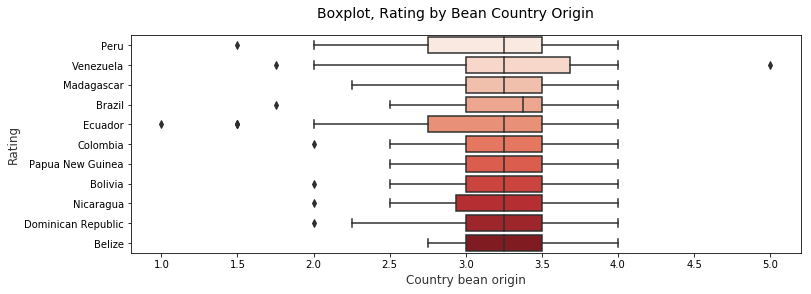

In [23]:
## Look best Cocoa Beans Grown
bestCocoaBeansGrown = cacao[cacao['broad_bean_origin'].isin(bean_origin[:11].index.tolist())]

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Boxplot, Rating by Bean Country Origin', fontsize=14)

sns.boxplot(data=bestCocoaBeansGrown,  
            x="rating", 
            y=bestCocoaBeansGrown.broad_bean_origin,
            palette="Reds",
            ax=ax)

ax.set_xlabel("Country bean origin",size=12,alpha=0.8)
ax.set_ylabel("Rating",size=12,alpha=0.8)
print("Fig 3: Boxplot, Rating by Bean Country Origin")

Brazil is the best rating of the main countries.

Text(0.5, 1.05, 'High Cocoa % = High Ratings?')

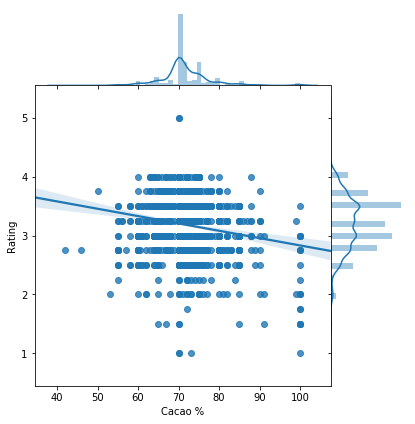

In [24]:
jp = sns.jointplot(data=cacao,
                   x='cacao_percent', 
                   y='rating', 
                   kind='reg',
                   space=0, height=6, ratio=4)
plt.xlabel('Cacao %')
plt.ylabel('Rating')
plt.title('High Cocoa % = High Ratings?', y=1.05)

* Higher % of cocoa does not imply higher score.
* Most chocolate bars have 70% cocoa. 

In [25]:
years = np.unique(cacao.review_date)
countries = companyL[:5].index.tolist()
mean_rating_year_review = [ [0] * len(years) for i in range(len(countries))]

j = 0
for country in countries:
    all_rating_country = cacao[cacao['company_location'] == country]
    i = 0
    for year in years:
        mean_rating_year_review[j][i] = all_rating_country[all_rating_country['review_date'] == year]['rating'].mean()
        i +=1
    j += 1
    
j = 0
for country in countries:
    all_rating_country = cacao[cacao['company_location'] == country]
    i = 0
    for year in years:
        mean_rating_year_review[j][i] = all_rating_country[all_rating_country['review_date'] == year]['rating'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)']
for i in range(len(countries)):
    traces.append(go.Scatter(
        x=years,
        y=mean_rating_year_review[i],
        mode='lines',
        name=countries[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Rating'),
    title='Average Rating on the Location Countries',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

* U.S.A has raised its rating
* Canada and France produce good chocolate bars.